# Les enjeux de la classification logistique

Il y a plusieurs nuances à la construction de classificateurs efficaces, des questions qui relèvent à la fois de la régression logistique et des autres méthodes d'apprentissage machine que nous allons explorer dans les prochains chapitres. Il s'agit notamment de la gestion des classes déséquilibrées (vu dans le deuxième cours), de la classification multi-classes et de la construction de véritables distributions de probabilité à partir de classificateurs indépendants.

## Classification multi-classes

Souvent, les tâches de classification impliquent de choisir parmi plus de deux étiquettes distinctes. Considérez le problème de l'identification du genre d'un film donné. Les possibilités logiques comprennent le drame, la comédie, l'animation, l'action, le documentaire et la comédie musicale.

Une approche naturelle (mais pas vraiment juste) pour représenter des classes k-distinctes ajouterait des numéros de classe au-delà de 0/1. Dans un problème de classification de la couleur des voiture, nous pourrions peut-être attribuer blanche = 0, le noire = 1, le rouge = 2, le bleu = 4, et ainsi de suite. Ensuite, nous pourrions effectuer une régression linéaire pour prédire le numéro de classe.

Mais c'est généralement une mauvaise idée. Les échelles ordinales sont définies par des valeurs croissantes ou décroissantes. À moins que l'ordre de vos classes ne reflète une échelle ordinale, la numérotation des classes sera une cible sans intérêt pour la régression.

Le modèle de régression logistique peut être généralisé pour prendre en charge directement plusieurs classes, sans avoir à former et à combiner plusieurs classificateurs binaires. C'est ce qu'on appelle la régression Softmax, ou régression logistique multinomiale.

L'idée est assez simple : lorsqu'on lui donne une instance $x$, le modèle de régression Softmax calcule d'abord un score $s_{k}(\mathbf{x})$ pour chaque classe $k$, puis estime la probabilité de chaque classe en appliquant la fonction softmax aux scores.

$$s_{k}(\mathbf{x})=\theta_{k}^{T} \cdot \mathbf{x}$$

Notez que chaque classe a son propre vecteur de paramètres dédié $\theta_{k}$. Tous ces vecteurs sont généralement stockés sous forme de lignes dans une matrice de paramètres $\Theta$.

Une fois que vous avez calculé le score de chaque classe pour l'observation $x$, vous pouvez estimer la probabilité $\hat{p}_{k}$ que l'instance appartienne à la classe $k$ en passant les scores par la fonction softmax ci-dessous : elle calcule l'exponentielle de chaque score, puis les normalise (en divisant par la somme de toutes les exponentielles).

$$\hat{p}_{k}=\sigma(\mathbf{s}(\mathbf{x}))_{k}=\frac{\exp \left(s_{k}(\mathbf{x})\right)}{\sum_{j=1}^{K} \exp \left(s_{j}(\mathbf{x})\right)}$$

- $K$ est le nombre de classes.
- $\mathbf{s}(\mathbf{x})$ est un vecteur contenant les scores de chaque classe pour l'instance $\mathbf{x}$.
- $\sigma(\mathbf{s}(\mathbf{x}))_{k}$ est la probabilité estimée que l'instance $\mathbf{x}$ appartienne à la classe $k$ étant donné les scores de chaque classe pour cette instance.

Tout comme le classificateur de régression logistique, le classificateur de régression Softmax prédit la classe ayant la probabilité estimée la plus élevée (qui est simplement la classe ayant le score le plus élevé), comme le montre l'équation ci-dessous.

$$\hat{y}=\underset{k}{\operatorname{argmax}} \sigma(\mathbf{s}(\mathbf{x}))_{k}=\underset{k}{\operatorname{argmax}} s_{k}(\mathbf{x})=\underset{k}{\operatorname{argmax}}\left(\theta_{k}^{T} \cdot \mathbf{x}\right)$$

L'opérateur `argmax` renvoie la valeur d'une variable qui maximise une fonction. Dans cette équation, il renvoie la valeur de $k$ qui maximise la probabilité estimée $\sigma(\mathbf{s}(\mathbf{x}))_{k}$.


Maintenant qu'on sait comment le modèle estime les probabilités et fait des prédictions, jetons un coup d'oeil à l’entraînement du modèle. L'objectif est d'avoir un modèle qui estime une probabilité élevée pour la classe cible (et par conséquent une faible probabilité pour les autres classes).

La minimisation de la fonction de coût indiquée dans l'équation ci-dessous, appelée entropie croisée, devrait permettre d'atteindre cet objectif car elle pénalise le modèle lorsqu'il estime une faible probabilité pour une classe cible. L'entropie croisée est fréquemment utilisée pour mesurer la correspondance entre un ensemble de probabilités de classe estimées et les classes cibles (nous l'utiliserons à nouveau plusieurs fois dans les chapitres suivants).

$$J(\Theta)=-\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} \log \left(\hat{p}_{k}^{(i)}\right)$$

où $y_{k}^{(i)}$ est égale à 1 si la classe cible pour la ième instance est $k$ ; sinon, elle est égale à 0.

Notez que lorsqu'il n'y a que deux classes $(K = 2)$, cette fonction de coût est équivalente à la fonction de coût de la régression logistique.

Le vecteur de gradient de cette fonction de coût par rapport à $\theta_{k}$ est donné par l'équation ci-dessous

$$\nabla_{\theta_{k}} J(\Theta)=\frac{1}{m} \sum_{i=1}^{m}\left(\hat{p}_{k}^{(i)}-y_{k}^{(i)}\right) \mathbf{x}^{(i)}$$

Vous pouvez maintenant calculer le vecteur de gradient pour chaque classe, puis utiliser Gradient Descent (ou tout autre algorithme d'optimisation) pour trouver la matrice de paramètres $\Theta$ qui minimise la fonction de coût.

Utilisons la régression Softmax pour classer les fleurs d'iris dans les trois classes. Scikit-Learn `LogisticRegression` utilise par défaut le principe "une classe contre plusieures" lorsque vous l'entraînez sur plus de deux classes, mais vous pouvez régler l'hyperparamètre `multi_classes` sur `multinomial` pour le faire passer à la régression Softmax à la place. Vous devez également spécifier un solveur qui supporte la régression Softmax, tel que le solveur "lbfgs" (voir la documentation de Scikit-Learn pour plus de détails). Il applique également la régularisation $\ell_2$ par défaut, que vous pouvez contrôler en utilisant l'hyperparamètre `C`.

In [9]:
np.random.seed(6100)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [3]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

Je vous suggère d'utiliser le solveur `lbfgs` ( Limited-memory Broyden–Fletcher–Goldfarb–Shanno) par défaut pour la plupart des cas. Il s'agit d'une approximation des mises à jour de la matrice de la dérivée seconde avec des évaluations de gradient. Il ne stocke que les dernières mises à jour, ce qui permet d'économiser de la mémoire.

Si vous avez beaucoup de données ou si vous avez besoin d'une régularisation de la $\ell_1$, essayez `saga`. Assurez-vous de standariser vos données si vous utilisez `saga`.

In [5]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Ainsi, la prochaine fois que vous trouverez un iris avec des pétales de 5 cm de long et 2 cm de large, vous pourrez demander à votre modèle de vous dire de quel type d'iris il s'agit, et il répondra Iris-Virginica (classe 2) avec une probabilité de 94,2% (ou Iris-Versicolor avec une probabilité de 5,8%) :

In [6]:
softmax_reg.predict([[5, 2]])

array([2])

In [7]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

La figure ci-dessous montre les limites de décision résultantes, représentées par les couleurs de fond. Remarquez que les limites de décision entre deux classes quelconques sont linéaires. La figure montre également les probabilités pour la classe Iris-Versicolor, représentées par les lignes courbes (par exemple, la ligne marquée 0,450 représente la limite de probabilité de 45 %). Notez que le modèle peut prédire une classe dont la probabilité estimée est inférieure à 50 %. Par exemple, au point où toutes les limites de décision se rencontrent, toutes les classes ont une probabilité estimée égale de 33%.

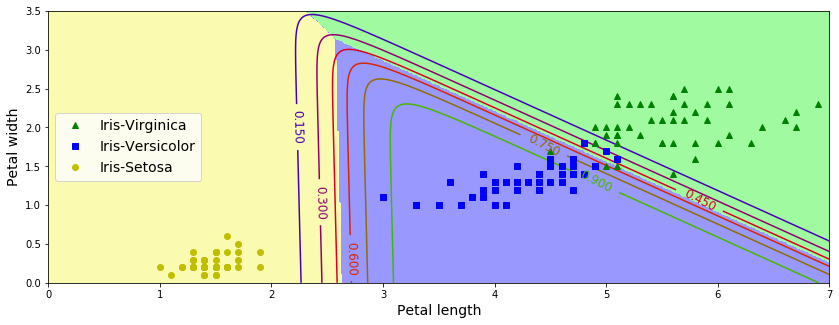

In [11]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(14, 5))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## Classification hiérarchique

Lorsque nous avons un grand nombre de classes, il est intéressant de les regrouper dans un arbre ou une hiérarchie afin d'améliorer à la fois la précision et l'efficacité. Supposons que nous construisions un arbre binaire, où chaque catégorie individuelle est représentée par un noeud feuille. Chaque noeud interne représente un classificateur permettant de distinguer les descendants de gauche des descendants de droite.

Pour utiliser cette hiérarchie afin de classer un nouvel élément x, nous commençons par la racine. En exécutant le classificateur racine sur x, on peut spécifier qu'il appartient au sous-arbre de gauche ou de droite. En descendant d'un niveau, nous comparons x avec le classificateur du nouveau nœud et nous continuons à répéter jusqu'à ce que nous atteignions une feuille, qui définit l'étiquette attribuée à x. Le temps nécessaire est proportionnel à la hauteur de l'arbre. Les classificateurs basés sur cette approche sont appelés arbres de décision, et seront examinés plus en détail dans les sectios à venir.
